# 2D binned correlation analysis of leaf angles from simulated TLS

### Importing modules

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import os
from scipy.stats import pearsonr
import pandas as pd
%matplotlib inline

### Defining function to bin 1D data based on a bin size

In [7]:
def binned_angle_frequency(data, bin_size):

    bin_min = np.arange(0, 90, bin_size)
    bin_max = bin_min + bin_size

    bincount = np.zeros(bin_min.shape[0], dtype=int)
    for i, (b1, b2) in enumerate(zip(bin_min, bin_max)):
        bin_mask = np.logical_and((data >= b1), (data <= b2))
        bincount[i] = data[bin_mask].shape[0]

    bincount = bincount.astype(float) / np.sum(bincount)

    return bincount

### Defining main function

In [8]:
def plot_comparison(ref_dist, est_dists, bin_size):

    df = pd.DataFrame([], columns=['pearson', 'p-value'])

    ref = np.loadtxt(ref_dist)

    color = iter(cm.rainbow(np.linspace(0, 1, len(est_dists))))
    plt.figure()

    for e in est_dists:

        label = os.path.splitext(os.path.basename(e))[0]

        est = np.loadtxt(e)

        binfreq = binned_angle_frequency(est, bin_size)

        plt.scatter(ref[:, 1], binfreq, c=next(color), label=label)

        r, p = pearsonr(ref[:, 1], binfreq)

        df.loc[label] = pd.Series({'pearson':r, 'p-value':p})

    plt.legend()

    return df

### Comparing TLS and RAMI reference angles over distance

,pearson,p-value
ACPL_10m,0.988839,1.168781e-14
ACPL_20m,0.991239,1.698053e-15
ACPL_30m,0.986465,5.427331e-14
ACPL_40m,0.986198,6.340945e-14
ACPL_50m,0.983117,3.148323e-13


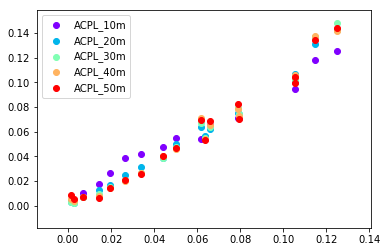

In [9]:
bin_size = 5

ref_dist = r'data/RAMI_ref/ACPL_angles.txt'

est_dists = [r'data/TLS/ACPL_10m.txt',
             r'data/TLS/ACPL_20m.txt',
             r'data/TLS/ACPL_30m.txt',
             r'data/TLS/ACPL_40m.txt',
             r'data/TLS/ACPL_50m.txt']

df = plot_comparison(ref_dist, est_dists, bin_size)
df

### Comparing TLS and DLP

,pearson,p-value
TICO2_10m,0.995418,9.625768e-18
tico2_DLP,0.834202,1.682748e-05


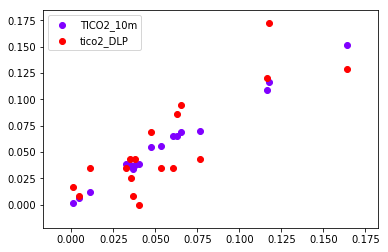

In [10]:
bin_size = 5

ref_dist = r'data/RAMI_ref/TICO2_angles.txt'

est_dists = [r'data/TLS/TICO2_10m.txt',
             r'data/DLP/tico2_DLP.txt']

df = plot_comparison(ref_dist, est_dists, bin_size)
df